In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers, utils
import numpy as np
from keras.layers.core import Lambda
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt

In [4]:
print(keras.__version__)
print(tf.__version__)

2.5.0
2.5.0


In [5]:
train=True
num_classes = 100
weight_decay = 0.0005
x_shape = [32,32,3]

In [6]:
model = Sequential()
weight_decay = weight_decay

model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
def normalize(X_train,X_test):
    #this function normalize inputs for zero mean and unit variance
    # it is used when training a model.
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    print(mean)
    print(std)
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

def normalize_production(x):
    #this function is used to normalize instances in production according to saved training set statistics
    # Input: X - a training set
    # Output X - a normalized training set according to normalization constants.

    #these values produced during first training and are general for the standard cifar10 training set normalization
    mean = 121.936
    std = 68.389
    return (x-mean)/(std+1e-7)

In [8]:
def predict(x,normalize=True,batch_size=50):
    if normalize:
        x = normalize_production(x)
    return model.predict(x,batch_size)

In [9]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = normalize(x_train, x_test)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

169017344/169001437 [==============================] - 11s 0us/step
121.93584
68.38902


In [11]:
batch_size = 128
maxepoches = 20
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

#optimization details
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy']) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
hist = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=maxepoches,
                    validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
model.save_weights('cifar100vgg.h5')  

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
390/390 - 85s - loss: 19.7377 - accuracy: 0.0272 - val_loss: 15.1959 - val_accuracy: 0.0102
Epoch 2/20
390/390 - 29s - loss: 11.3734 - accuracy: 0.0467 - val_loss: 9.7021 - val_accuracy: 0.0113
Epoch 3/20
390/390 - 28s - loss: 7.4110 - accuracy: 0.0576 - val_loss: 6.8513 - val_accuracy: 0.0302
Epoch 4/20
390/390 - 29s - loss: 5.6061 - accuracy: 0.0739 - val_loss: 5.4169 - val_accuracy: 0.0560
Epoch 5/20
390/390 - 29s - loss: 4.7223 - accuracy: 0.0959 - val_loss: 4.4538 - val_accuracy: 0.1099
Epoch 6/20
390/390 - 28s - loss: 4.2610 - accuracy: 0.1208 - val_loss: 4.1662 - val_accuracy: 0.1243
Epoch 7/20
390/390 - 29s - loss: 4.0679 - accuracy: 0.1367 - val_loss: 3.8621 - val_accuracy: 0.1709
Epoch 8/20
390/390 - 28s - loss: 3.9147 - accuracy: 0.1609 - val_loss: 3.9638 - val_accuracy: 0.1580
Epoch 9/20
390/390 - 28s - loss: 3.8294 - accuracy: 0.1829 - val_loss: 3.8656 - val_accuracy: 0.1900
Epoch 10/20
390/390 - 29s - loss: 3.7651 - accuracy: 0.2078 - val_loss: 3.8492 - val_acc

In [12]:
model.save('cifar100vgg.h5') 

In [13]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 0.99%


Saved model to disk


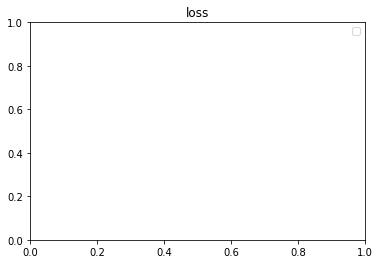

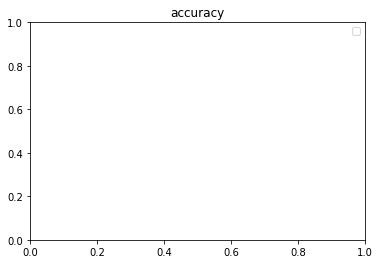

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
#plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')
#plt.savefig("accuracy7.png",dpi=300,format="png")
model_json = model.to_json()
with open("model7.json", "w") as json_file:
   json_file.write(model_json)
#serialize_weights to HDF5
model.save_weights("model7.h5")
print("Saved model to disk")